### Gradient Frequency Attention

In [1]:
import Process_Data.constants as c
import matplotlib.pyplot as plt
import numpy as np

#### I. Method

##### 1. Weight Gather

1.1 Constant from CAM and f-ratio

* Gradient

* Grad-CAM

* Layer-CAM

* InteGrad

* f-ratio

* f-ratio of CAM

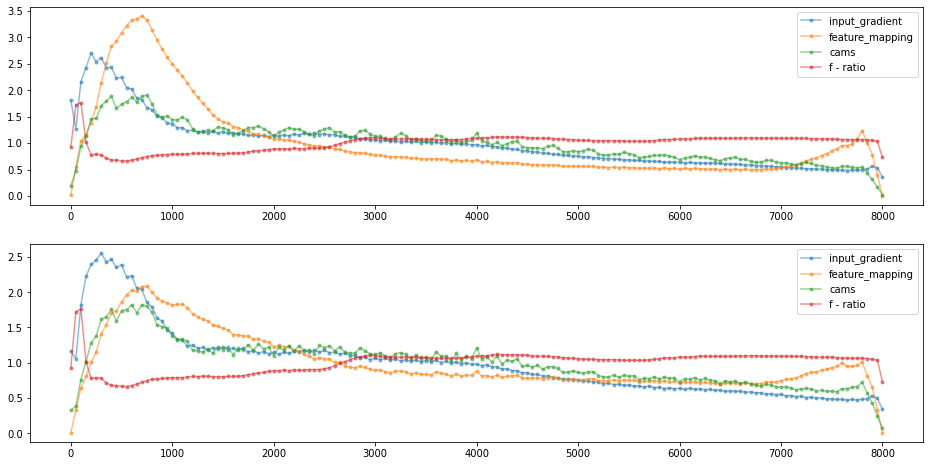

In [13]:
plt.figure(figsize=(16, 8))
x = np.linspace(0, 8000, 161)

plt.subplot(2,1,1)
for w in [c.VOX2_RCLEAN_GRAD_MEAN, c.VOX2_RCLEAN_INPT_MEAN, c.VOX2_RCLEAN_INGR_MEAN, c.VOX2_FRATIO]:
    w = np.array(w)
    w /= w.mean()
    plt.plot(x, w, marker='.', alpha=0.5)

plt.legend(['input_gradient', 'feature_mapping', 'cams','f - ratio'])

plt.subplot(2,1,2)
for w in [c.VOX2_RCLEAN_GRAD_MAX, c.VOX2_RCLEAN_INPT_MAX, c.VOX2_RCLEAN_INGR_MAX, c.VOX2_FRATIO]:
    w = np.array(w)
    w /= w.mean()
    plt.plot(x, w, marker='.', alpha=0.5)

plt.legend(['input_gradient', 'feature_mapping', 'cams','f - ratio'])



1.2 Learnable 

- [x] *Frequency importance* with trainable attention layers. (FRL)

Mel Fbank - 40:

| System      |  Description  |    feature_dim    |    EER(%)   |    MinDCF08   |    MinDCF10   |
| :---------- | :-----------: | :---------------: | ----------: | ------------: | ------------: |
|  ResNet18   |     sgd       |         40        |     4.31    |     0.3779    |     0.4570    |
|  ResNet18   |     sgd+frl   |         40        |     4.43    |     0.3826    |     0.4707    |
|  ResNet18   |     adam      |         40        |     4.29    |     0.4075    |     0.5157    |
|  ResNet18   |     adam+frl  |         40        |     4.60    |     0.4176    |     0.5106    |

|  ResNet18   |     sgd       |         64        |     4.31    |     0.3779    |     0.4570    |
|  ResNet18   |     sgd+frl   |         64        |     4.43    |     0.3826    |     0.4707    |

|  ResNet18   |     sgd       |         80        |     4.02    |     0.3877    |     0.4784    |
|  ResNet18   |     sgd+frl   |         80        |     3.90    |     0.3449    |     0.4216    |

|  ResNet18   |     sgd       |        161        |     4.31    |     0.3779    |     0.4570    |
|  ResNet18   |     sgd+frl   |        161        |     4.43    |     0.3826    |     0.4707    |


For lower dimensional mel fbank features, **FRL** actually hurts the performance. For higher dimensional features, it could bring improvements.


- [ ] Sparset Filterbank 


1.3 Distribution

- [ ] Todo: Extracting different weights from different datasets.


##### 2. Application of Weight

2.1 Single-level Attention

* Multiply


Multiply input acoustic features with weights in frequency axis.


* Dropout

Dropout input acoustic features with weights in frequency axis.



2.2 Multi-level Attention

Applying multi-level attention mechanism to multi-layer CNN in early stages like **Frequency Reweight Layer**.



#### II. Comparison


##### 1. Single-level Attention

* Input Layer

| System      |  Description  |       Testset     |     EER     |    MinDCF08   |    MinDCF10   |
| :---------- | :-----------: | :---------------: | ----------: | ------------: | ------------: |
|  ResNet34   |   teacher     |     vox1-test     |  2.08±0.09  | 0.1965±0.0011 | 0.3089±0.0059 |
|  ResNet18   |   baseline    |     vox1-test     |  3.70±0.08  | 0.3426±0.0203 | 0.4623±0.0587 |
|      -      |      mel      |     vox1-test     |  3.55±0.02  | 0.3497±0.0070 | 0.4450±0.0365 |
|      -      |    v2_gean    |     vox1-test     |  3.58±0.12  | 0.3414±0.0088 | 0.4582±0.0248 |
|      -      |    v2_gax     |     vox1-test     |  3.73±0.08  | 0.3532±0.0177 | 0.4486±0.0195 |
|  ResNet10   |   baseline    |     vox1-test     |  4.18±0.07  | 0.4039±0.0090 | 0.5165±0.0224 |


##### 1. Multi-level Attention
